    Jacob Knopping
    3/25/2020

### 34.5 Challenge: What to use

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. 

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Codebook link: https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

CSV file link: https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
ess_df = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
ess_df.shape

(8594, 13)

In [4]:
ess_df.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0


__Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

In [5]:
# Trust for each country, for combined years
ess_df.groupby('cntry')['ppltrst'].mean()

cntry
CH    5.714748
CZ    4.393731
DE    5.285714
ES    5.004950
NO    6.623973
SE    6.158214
Name: ppltrst, dtype: float64

In [6]:
ess_df.year.unique()

array([6, 7], dtype=int64)

Year 6 = 2012, year 7 = 2014

In [7]:
# Get dataframe for 2012 only
df_2012 = ess_df.loc[ess_df.year == 6]
df_2012.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0


In [8]:
# Get mean trust for each country in 2012
df_2012.groupby('cntry')['ppltrst'].mean()

cntry
CH    5.677878
CZ    4.362519
DE    5.214286
ES    5.114592
NO    6.649315
SE    6.058499
Name: ppltrst, dtype: float64

In [9]:
df_2014 = ess_df.loc[ess_df.year == 7]
df_2014.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0


In [10]:
df_2014.groupby('cntry')['ppltrst'].mean()

cntry
CH    5.751617
CZ    4.424658
DE    5.357143
ES    4.895128
NO    6.598630
SE    6.257709
Name: ppltrst, dtype: float64

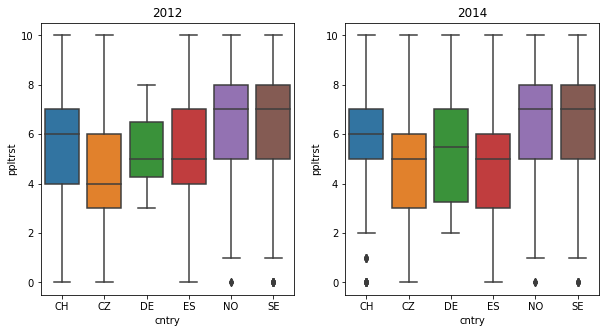

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='cntry', y='ppltrst', data=df_2012)
plt.title('2012')

plt.subplot(1,2,2)
sns.boxplot(x='cntry', y='ppltrst', data=df_2014)
plt.title('2014')

plt.show()

Overall, the results for each country appear visually and statistically similar. However, comparison tests can be used to determine if there are any significant differences.

In [12]:
# Get list of countries
cntry_list = list(ess_df.cntry.unique())
cntry_list

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

Let's figure out what the distribution looks like, to understand whether or not parametric or non-parametric comparison tests should be used.

In [13]:
df_2012.loc[df_2012['cntry'] == 'CH']

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,CH,2890.0,6,5.0,7.0,7.0,5.0,8.0,4.0,2.0,1.0,75.0,1.0
769,CH,2893.0,6,5.0,7.0,7.0,8.0,10.0,3.0,3.0,1.0,NaN,1.0
770,CH,2894.0,6,3.0,5.0,7.0,5.0,9.0,6.0,4.0,1.0,24.0,1.0
771,CH,2900.0,6,4.0,7.0,7.0,6.0,10.0,2.0,2.0,2.0,59.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


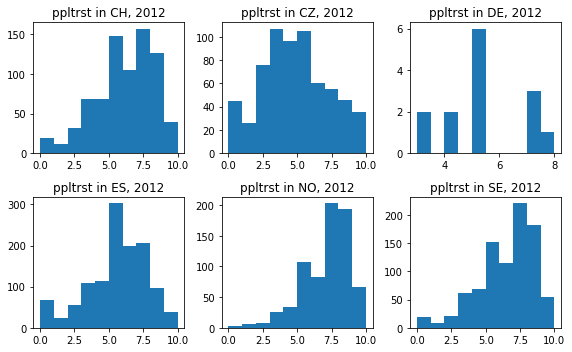

In [14]:
plt.figure(figsize=(8,5))

for i, country in enumerate(cntry_list):
    plt.subplot(2,3,i+1)
    plt.hist(df_2012['ppltrst'].loc[df_2012['cntry'] == country])
    plt.title("ppltrst in {}, 2012".format(country))

plt.tight_layout()
plt.show()

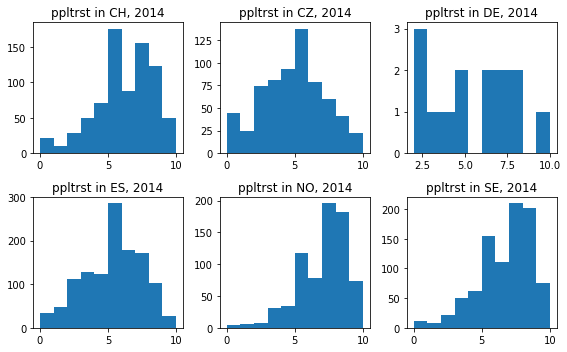

In [15]:
plt.figure(figsize=(8,5))

for i, country in enumerate(cntry_list):
    plt.subplot(2,3,i+1)
    plt.hist(df_2014['ppltrst'].loc[df_2014['cntry'] == country])
    plt.title("ppltrst in {}, 2014".format(country))

plt.tight_layout()
plt.show()

Distribution visually appears to be close enough to normal to perform parametric testing. Distributions that appear overly non-normal are likely the result of a smaller sample size.

In [16]:
print(df_2012.shape[0], df_2014.shape[0])

4297 4297


Assuming that the same people were used for both years, given the exact same number of particpants for both years, we will perform a pair-wise t-test using SciPy stats.

In [17]:
# For each country, perform pair-wise t-test
for country in (cntry_list):
    print(stats.ttest_rel(df_2012['ppltrst'].loc[df_2012['cntry'] == country],
                         df_2014['ppltrst'].loc[df_2014['cntry'] == country]))


Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=nan, pvalue=nan)


C:\Users\Jacob Knopping\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Jacob Knopping\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Jacob Knopping\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


It looks like missing values are causing 'nan' values, so let's fill in the missng values and try again.

In [18]:
df_2012.isnull().sum()

cntry        0
idno         0
year         0
tvtot        6
ppltrst     10
pplfair     20
pplhlp      15
happy       21
sclmeet      9
sclact      46
gndr         0
agea       126
partner      7
dtype: int64

In [19]:
# Fill missing data with the mean
df_2012 = df_2012.fillna(df_2012.mean())
df_2014 = df_2014.fillna(df_2012.mean())

In [20]:
# For each country, perform pair-wise t-test
for country in (cntry_list):
    print("{}:\n".format(country),
        stats.ttest_rel(df_2012['ppltrst'].loc[df_2012['cntry'] == country],
        df_2014['ppltrst'].loc[df_2014['cntry'] == country]))


CH:
 Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ:
 Ttest_relResult(statistic=-0.3804542045224136, pvalue=0.7037312554831489)
DE:
 Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES:
 Ttest_relResult(statistic=2.473526447545717, pvalue=0.013514932435663018)
NO:
 Ttest_relResult(statistic=0.5359631183350579, pvalue=0.5921473023604757)
SE:
 Ttest_relResult(statistic=-2.0878594220425235, pvalue=0.03708901921114203)


According to the t-tests (pair-wise), the only countries that saw a change in trust that was significantly different were Spain, or 'ES' (decrease in trust) and Sweden, or 'SE' (increase in trust). This is to say the null hypothesis (no difference between trust for each year) is rejected. This was of course with the assumption that a pair-wise t-test was more appropriate in this situation. For the sake of thoroughness, let's see if the results of an independent t-test are any different.

In [21]:
# For each country, perform t-test for independent groups
for country in (cntry_list):
    print("{}:\n".format(country),
        stats.ttest_ind(df_2012['ppltrst'].loc[df_2012['cntry'] == country],
        df_2014['ppltrst'].loc[df_2014['cntry'] == country]))

CH:
 Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ:
 Ttest_indResult(statistic=-0.39395945807651794, pvalue=0.6936748927882519)
DE:
 Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES:
 Ttest_indResult(statistic=2.4837112910199832, pvalue=0.013069225372914025)
NO:
 Ttest_indResult(statistic=0.5436352898756369, pvalue=0.5867754671861539)
SE:
 Ttest_indResult(statistic=-2.102858056828469, pvalue=0.03561563543342475)


The results are the same: Spain saw a signicant decrease in trust for 2012 to 2014, while Swedent saw an increase in trust over the same time period.

__Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.__

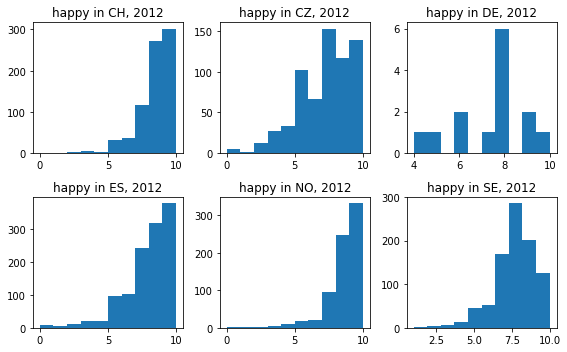

In [22]:
plt.figure(figsize=(8,5))

for i, country in enumerate(cntry_list):
    plt.subplot(2,3,i+1)
    plt.hist(df_2012['happy'].loc[df_2012['cntry'] == country])
    plt.title("happy in {}, 2012".format(country))

plt.tight_layout()
plt.show()

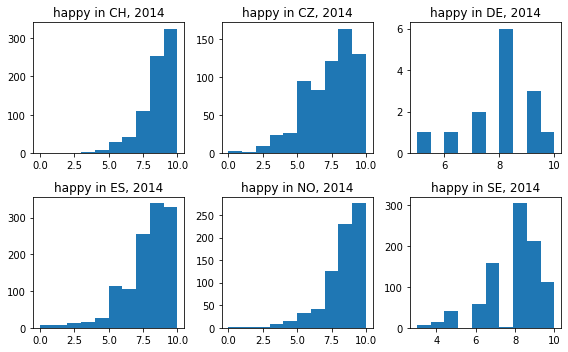

In [23]:
plt.figure(figsize=(8,5))

for i, country in enumerate(cntry_list):
    plt.subplot(2,3,i+1)
    plt.hist(df_2014['happy'].loc[df_2014['cntry'] == country])
    plt.title("happy in {}, 2014".format(country))

plt.tight_layout()
plt.show()

The distributions all appear to be skewed to the left; people report being happy much more frequently than netrual or unhappy. Given that this is not a normal distribution, a non-parametric comparison might be better in this case. We will peform as Kruskal-Wallace test, rather than a t-test.

In [24]:
#Kruskal-Wallace test using scipy stats

for country in (cntry_list):
    print("{}:\n".format(country),
        stats.kruskal(df_2012['happy'].loc[df_2012['cntry'] == country],
        df_2014['happy'].loc[df_2014['cntry'] == country]))

CH:
 KruskalResult(statistic=0.290200214764067, pvalue=0.5900922565247079)
CZ:
 KruskalResult(statistic=1.3893709654023114, pvalue=0.23851135722247688)
DE:
 KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)
ES:
 KruskalResult(statistic=4.08599866595559, pvalue=0.04323989176550507)
NO:
 KruskalResult(statistic=18.352664983589847, pvalue=1.8356204614283526e-05)
SE:
 KruskalResult(statistic=0.038560589039303116, pvalue=0.8443217471247867)


In [25]:
# T-test for comparison, if the distribution were more normal

for country in (cntry_list):
    print("{}:\n".format(country),
        stats.ttest_rel(df_2012['happy'].loc[df_2012['cntry'] == country],
        df_2014['happy'].loc[df_2014['cntry'] == country]))

CH:
 Ttest_relResult(statistic=-0.4045884706639427, pvalue=0.6858921044617527)
CZ:
 Ttest_relResult(statistic=-1.2162943702781523, pvalue=0.2243095983603843)
DE:
 Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
ES:
 Ttest_relResult(statistic=1.6346420251894398, pvalue=0.10238379498151123)
NO:
 Ttest_relResult(statistic=4.221670109393773, pvalue=2.7310755622411475e-05)
SE:
 Ttest_relResult(statistic=-0.5651795499883743, pvalue=0.5720914113040425)


According to the Kruskal-Wallace comparison test, the null hypothesis (there would no difference in happiness between 2012 and 2014 for each country) is rejected for Spain('ES'), and Norway('NO'), with an alpha value of 0.05. 

**Note that using a t-test would not reject the null hypothesis for Spain, so choosing the correct comparison test is important here

In [26]:
df_2012.groupby('cntry')['happy'].mean()

cntry
CH    8.086896
CZ    6.788272
DE    7.428571
ES    7.548824
NO    8.248829
SE    7.907185
Name: happy, dtype: float64

In [27]:
df_2014.groupby('cntry')['happy'].mean()

cntry
CH    8.116429
CZ    6.921492
DE    7.857143
ES    7.420217
NO    7.915185
SE    7.946223
Name: happy, dtype: float64

While some countries saw an increase in happiness, like the Czech Republic ('CZ'), none of those increases were statisically significant. The only statiscally significant changes were for Norway and Spain, which saw a significant decrease in happiness from 2012 to 2014.

__Question 3: Who reported watching more TV in 2012, men or women?__

In [28]:
#1 = male, 2 = female
df_2012.groupby('gndr')['tvtot'].mean()

gndr
1.0    3.901936
2.0    3.944363
Name: tvtot, dtype: float64

In [29]:
# Male and female are two independent groups, use independent t-test
stats.ttest_ind(df_2012['tvtot'].loc[df_2012['gndr'] == 1.0],
               df_2012['tvtot'].loc[df_2012['gndr'] == 2.0])

Ttest_indResult(statistic=-0.6899929757537578, pvalue=0.49023588447282207)

While the mean for females watching tv is marginally higher (3.94, versus 3.90 for males), there is no statistical significance to this difference. The p-value for the t-test is greater than alpha (=.05), so the null hypothesis (there is no difference between the male and female population) fails to be rejected.

__Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?__

In [30]:
# 1 = lives with partner, 2 = lives alone
df_2012.groupby('partner')['pplfair'].mean()

partner
1.00000    6.080395
1.37669    6.856842
2.00000    5.857663
Name: pplfair, dtype: float64

1.38 represents the mean used to fill missing data, ignore.

In [31]:
stats.ttest_ind(df_2012['pplfair'].loc[df_2012['partner'] == 1.0],
               df_2012['pplfair'].loc[df_2012['partner'] == 2.0])

Ttest_indResult(statistic=3.319724959187467, pvalue=0.0009085893209899276)

People living with a partner (husband/wife/partner at household grid) were more likely to belive people were fair in 2012, and this difference was significantly different.

__Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?__

To compare differences between multiple groups (countries), a one-way ANOVA test is appropriate.

In [32]:
# One-way ANOVA

F, p = stats.f_oneway(
    df_2014['sclmeet'].loc[df_2014['cntry'] == 'ES'],
    df_2014['sclmeet'].loc[df_2014['cntry'] == 'SE'],
    df_2014['sclmeet'].loc[df_2014['cntry'] == 'NO']
)

p

0.024041227015691235

Yes, there are differences in how often people met socially in 2014 for these countries (p value < 0.05).

In [33]:
print(stats.ttest_ind(df_2014['sclmeet'].loc[df_2014['cntry'] == 'ES'],
df_2014['sclmeet'].loc[df_2014['cntry'] == 'SE']))
print(stats.ttest_ind(df_2014['sclmeet'].loc[df_2014['cntry'] == 'SE'],
df_2014['sclmeet'].loc[df_2014['cntry'] == 'NO']))
print(stats.ttest_ind(df_2014['sclmeet'].loc[df_2014['cntry'] == 'ES'],
df_2014['sclmeet'].loc[df_2014['cntry'] == 'NO']))

Ttest_indResult(statistic=-2.6525904036682015, pvalue=0.008047277169946321)
Ttest_indResult(statistic=1.8305856428076237, pvalue=0.06734412432597783)
Ttest_indResult(statistic=-0.6342432361177603, pvalue=0.5259967960508687)


With an alpha value of 0.05, the only significant difference is between Spain and Sweden.

In [34]:
print("Spain:", df_2014['sclmeet'].loc[df_2014['cntry'] == 'ES'].mean())
print("Sweden:", df_2014['sclmeet'].loc[df_2014['cntry'] == 'SE'].mean())

Spain: 5.2600620147408055
Sweden: 5.426211453744493


People met socially more often in Sweden than Spain, and this difference was statistically significant.

__Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?__

The variable for this is 'sclact': take part in social activities compared to others of same age.

In [35]:
# One-way ANOVA

F, p = stats.f_oneway(
    df_2014['sclact'].loc[df_2014['cntry'] == 'ES'],
    df_2014['sclact'].loc[df_2014['cntry'] == 'SE'],
    df_2014['sclact'].loc[df_2014['cntry'] == 'NO']
)

p

1.146508364432382e-12

Yes, there was a significant difference in how often people took part in social activities, relative to others their age, in 2014.

In [36]:
print(stats.ttest_ind(df_2014['sclact'].loc[df_2014['cntry'] == 'ES'],
df_2014['sclact'].loc[df_2014['cntry'] == 'SE']))
print(stats.ttest_ind(df_2014['sclact'].loc[df_2014['cntry'] == 'SE'],
df_2014['sclact'].loc[df_2014['cntry'] == 'NO']))
print(stats.ttest_ind(df_2014['sclact'].loc[df_2014['cntry'] == 'ES'],
df_2014['sclact'].loc[df_2014['cntry'] == 'NO']))

Ttest_indResult(statistic=-6.503359447113637, pvalue=9.768375114389585e-11)
Ttest_indResult(statistic=0.4687981718829239, pvalue=0.6392763281322797)
Ttest_indResult(statistic=-5.669567670830333, pvalue=1.6461650315159042e-08)


There is a statistically significant difference between Spain and Sweden, and Spain and Norway.

In [37]:
print("Spain:", df_2014['sclact'].loc[df_2014['cntry'] == 'ES'].mean())
print("Sweden:", df_2014['sclact'].loc[df_2014['cntry'] == 'SE'].mean())
print("Norway:", df_2014['sclact'].loc[df_2014['cntry'] == 'NO'].mean())

Spain: 2.6197265451143554
Sweden: 2.878811878417827
Norway: 2.859097127222982


The only difference in how often people took part in social activities, relative to others their age, in 2014, that was no significant was Sweden and Norway. This makes sense has the mean for this category for both countries is very similar (2.88 and 2.86, respectively).